### Тема “Обучение без учителя”

# Задание 1.

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston["data"]
data.shape

(506, 13)

In [6]:
target = boston["target"]
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [7]:
feature_names = boston["feature_names"]
feature_names.shape

DESCR = boston["DESCR"]

X = pd.DataFrame(data, columns = feature_names) #  создание датафрейма Х

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) #Разбиение выборки на тренировочную и тестовую

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # масштабирование данных
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42) # построение модели T-SNE на тренировочных данных

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(354, 13)
После:	(354, 2)


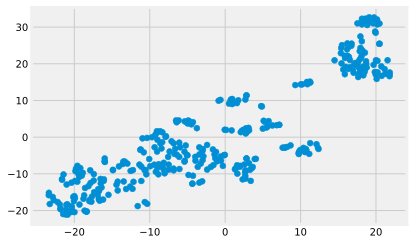

In [15]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]) # построение диаграммы рассеивания данных

plt.show()

# Задание 2.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter = 100, random_state=42) # разбиваем на 3 кластера 

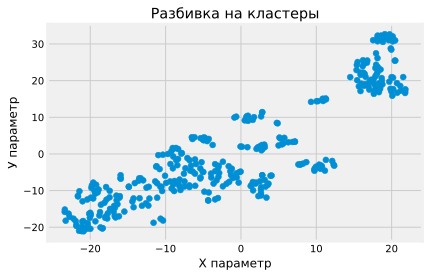

In [24]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]) # построение диаграммы рассеивания данных

plt.xlabel('Х параметр')
plt.ylabel('У параметр')

plt.title('Разбивка на кластеры')

plt.show()

# Задание 3.

In [17]:
? RandomForestRegressor

Object ` RandomForestRegressor` not found.


In [18]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)
model.fit(X_train, y_train.values[:, 0])
feature_importance = model.feature_importances_
feature_importance

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [19]:
total_fi = np.sum(feature_importance)
total_fi

1.0

In [20]:
result_fi = pd.DataFrame({
    'Feature': boston["feature_names"],
    'volume': feature_importance})

result_fi.sort_values(by = 'volume', ascending = False)

,Feature,volume
12,LSTAT,0.415847
5,RM,0.402682
7,DIS,0.063973
0,CRIM,0.031676
10,PTRATIO,0.018081
6,AGE,0.014299
4,NOX,0.014269
11,B,0.012451
9,TAX,0.011525
2,INDUS,0.007138


Два наиболее важных признака:
    
    - LSTAT (0.415847);
    
    - RM (0.402682).